In [1]:
library(qvalue)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# m-bulk
# bulk_matched_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkDay0Healthy_PCA20_88_206/"
# leads = read.csv(paste0(bulk_matched_folder,"top_qtl_results_all.txt"), sep = "\t")
# nrow(leads)
# res = read.csv(paste0(bulk_matched_folder,"qtl_results_all.txt"), sep = "\t")
# nrow(res)

In [37]:
df_common_genes = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/common_genes_across_all_aggregation_methods_and_bulk.csv")
common_genes = as.character(df_common_genes$gene)
length(common_genes)

[1] 12720

In [3]:
# a-bulk
bulk_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkTotal_PCA20/"

In [4]:
res_all = read.csv(paste0(bulk_folder,"qtl_results_all.txt"), sep = "\t")
nrow(res_all)

[1] 18974762

In [5]:
leads_all = read.csv(paste0(bulk_folder,"top_qtl_results_all.txt"), sep = "\t")
nrow(leads_all)
leads_all$q_value = qvalue(leads_all$empirical_feature_p_value)$qvalues

[1] 49916

In [6]:
max_qval = max(leads_all[leads_all$q_value < 0.1,'q_value'])
emp_pv_star_all = max(leads_all[leads_all$q_value==max_qval, "empirical_feature_p_value"])
emp_pv_star_all

[1] 0.06617059

In [7]:
# dr-mean

In [38]:
mean_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/mean/"
my_folder = paste0(mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") 

In [39]:
df = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues

In [40]:
max_qval = max(df[df$q_value < 0.1,'q_value'])
emp_pv_star = max(df[df$q_value==max_qval, "empirical_feature_p_value"])
emp_pv_star

[1] 0.00891985

In [41]:
df0 = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

In [42]:
df1 = inner_join(df, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df1 = df1[df1$feature_id %in% common_genes,]

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

In [43]:
cor.test(df1$beta.sc, df1$beta.bulk)


	Pearson's product-moment correlation

data:  df1$beta.sc and df1$beta.bulk
t = 94.982, df = 12771, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6331324 0.6534611
sample estimates:
      cor 
0.6434102 


[1] 12773

[1] 1103

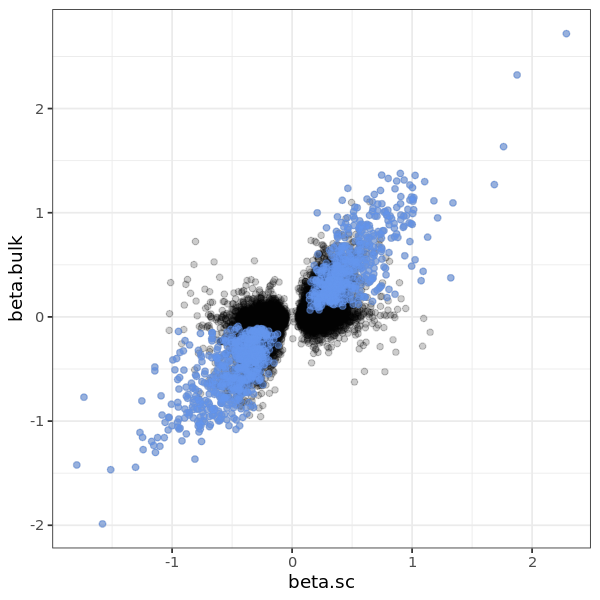

In [44]:
options(repr.plot.width = 5, repr.plot.height = 5)
nrow(df1)
nrow(df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.bulk < emp_pv_star_all & df1$beta.sc*df1$beta.bulk>0,])
ggplot(df1, aes(x = beta.sc, y = beta.bulk)) + geom_point(alpha = 0.2) + theme_bw() +
    geom_point(aes(x = beta.sc, y = beta.bulk), 
               data = df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.bulk < emp_pv_star_all & 
                          df1$beta.sc*df1$beta.bulk>0,], 
               col = "cornflowerblue", alpha = 0.5)

In [45]:
df2 = inner_join(df0, leads_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df2 = df2[df2$feature_id %in% common_genes,]

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

In [46]:
cor.test(df2$beta.sc, df2$beta.bulk)


	Pearson's product-moment correlation

data:  df2$beta.sc and df2$beta.bulk
t = 128.02, df = 12883, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7405648 0.7557657
sample estimates:
      cor 
0.7482635 


[1] 12885

[1] 938

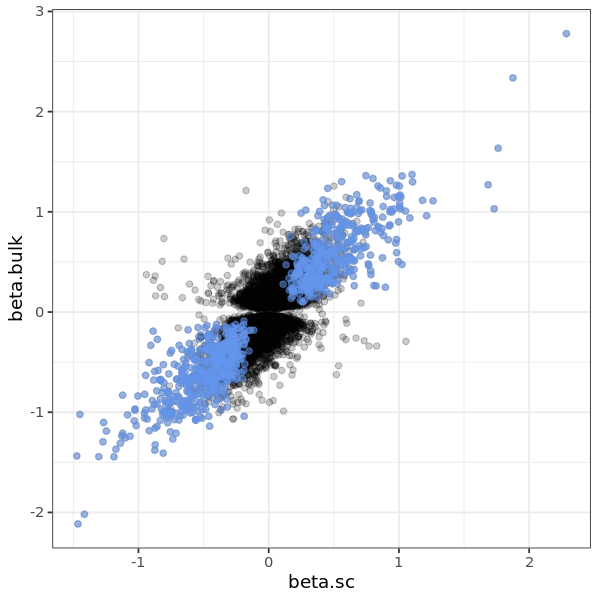

In [47]:
nrow(df2)
nrow(df2[df2$q_value < 0.05 & df2$empirical_feature_p_value.sc < emp_pv_star & df2$beta.sc*df2$beta.bulk>0,])
ggplot(df2, aes(x = beta.sc, y = beta.bulk)) + geom_point(alpha = 0.2) + theme_bw() +
    geom_point(aes(x = beta.sc, y = beta.bulk), 
               data = df2[df2$q_value < 0.05 & df2$empirical_feature_p_value.sc < emp_pv_star & 
                          df2$beta.sc*df2$beta.bulk>0,], 
               col = "cornflowerblue", alpha = 0.5)

In [18]:
###################

In [48]:
# dr-sum
sum_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/sum/"
my_folder = paste0(sum_folder,"Run_Output_PCA20_88_log_TPM_edgeR_libsize_206/") 

In [49]:
df = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues

In [50]:
max_qval = max(df[df$q_value < 0.1,'q_value'])
emp_pv_star = max(df[df$q_value==max_qval, "empirical_feature_p_value"])
emp_pv_star

[1] 0.004522258

In [51]:
df0 = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

In [52]:
df1 = inner_join(df, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df1 = df1[df1$feature_id %in% common_genes,]

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

In [53]:
cor.test(df1$beta.sc, df1$beta.bulk)


	Pearson's product-moment correlation

data:  df1$beta.sc and df1$beta.bulk
t = 93.224, df = 12534, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6294381 0.6501161
sample estimates:
      cor 
0.6398929 


[1] 12536

[1] 825

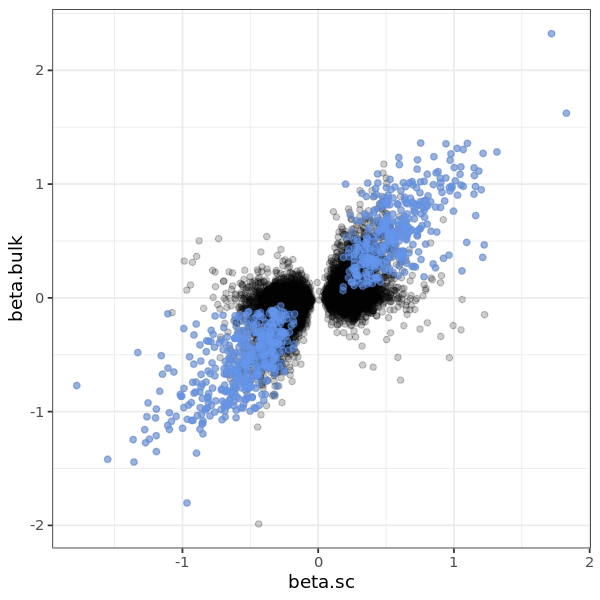

In [54]:
nrow(df1)
nrow(df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.bulk < emp_pv_star_all & df1$beta.sc*df1$beta.bulk>0,])
ggplot(df1, aes(x = beta.sc, y = beta.bulk)) + geom_point(alpha = 0.2) + theme_bw() +
    geom_point(aes(x = beta.sc, y = beta.bulk), 
               data = df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.bulk < emp_pv_star_all & 
                          df1$beta.sc*df1$beta.bulk>0,], 
               col = "cornflowerblue", alpha = 0.5)

In [55]:
df2 = inner_join(df0, leads_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df2 = df2[df2$feature_id %in% common_genes,]

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

In [56]:
cor.test(df2$beta.sc, df2$beta.bulk)


	Pearson's product-moment correlation

data:  df2$beta.sc and df2$beta.bulk
t = 123.08, df = 12654, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7301204 0.7459819
sample estimates:
      cor 
0.7381531 


[1] 12656

[1] 716

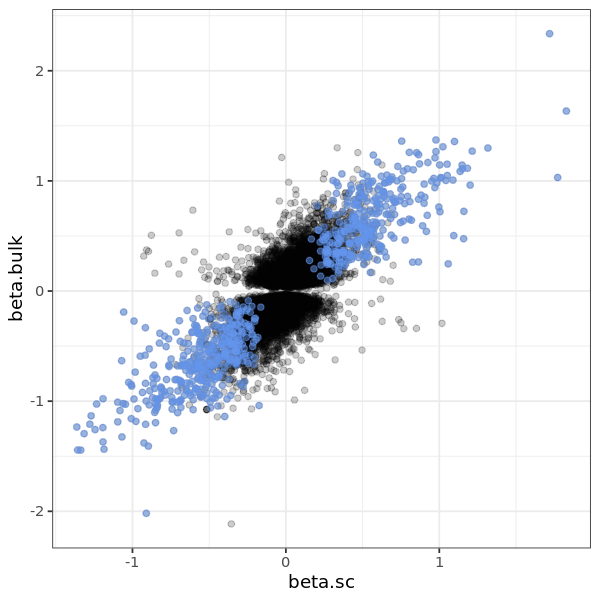

In [57]:
nrow(df2)
nrow(df2[df2$q_value < 0.05 & df2$empirical_feature_p_value.sc < emp_pv_star & df2$beta.sc*df2$beta.bulk>0,])
ggplot(df2, aes(x = beta.sc, y = beta.bulk)) + geom_point(alpha = 0.2) + theme_bw() +
    geom_point(aes(x = beta.sc, y = beta.bulk), 
               data = df2[df2$q_value < 0.05 & df2$empirical_feature_p_value.sc < emp_pv_star & 
                          df2$beta.sc*df2$beta.bulk>0,], 
               col = "cornflowerblue", alpha = 0.5)

In [66]:
###################
# dr-median
median_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/median/"
my_folder = paste0(median_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") 

In [67]:
df = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues
max_qval = max(df[df$q_value < 0.1,'q_value'])
emp_pv_star = max(df[df$q_value==max_qval, "empirical_feature_p_value"])
emp_pv_star
df0 = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

[1] 0.01414493

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 12761

[1] 901


	Pearson's product-moment correlation

data:  df1$beta.sc and df1$beta.bulk
t = 73.913, df = 12759, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5352838 0.5595833
sample estimates:
     cor 
0.547549 


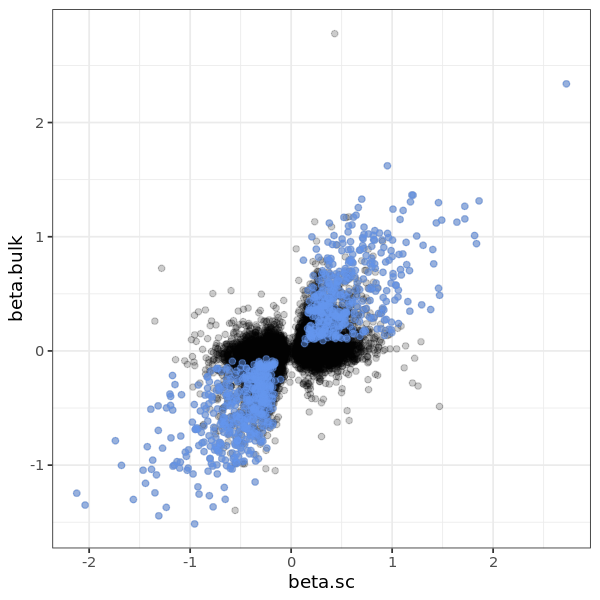

In [68]:
df1 = inner_join(df, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df1 = df1[df1$feature_id %in% common_genes,]
nrow(df1)
nrow(df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.bulk < emp_pv_star_all & df1$beta.sc*df1$beta.bulk>0,])
cor.test(df1$beta.sc, df1$beta.bulk)
ggplot(df1, aes(x = beta.sc, y = beta.bulk)) + geom_point(alpha = 0.2) + theme_bw() +
    geom_point(aes(x = beta.sc, y = beta.bulk), 
               data = df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.bulk < emp_pv_star_all & 
                          df1$beta.sc*df1$beta.bulk>0,], 
               col = "cornflowerblue", alpha = 0.5)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 12885

[1] 763


	Pearson's product-moment correlation

data:  df2$beta.sc and df2$beta.bulk
t = 98.292, df = 12883, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6446543 0.6643912
sample estimates:
      cor 
0.6546343 


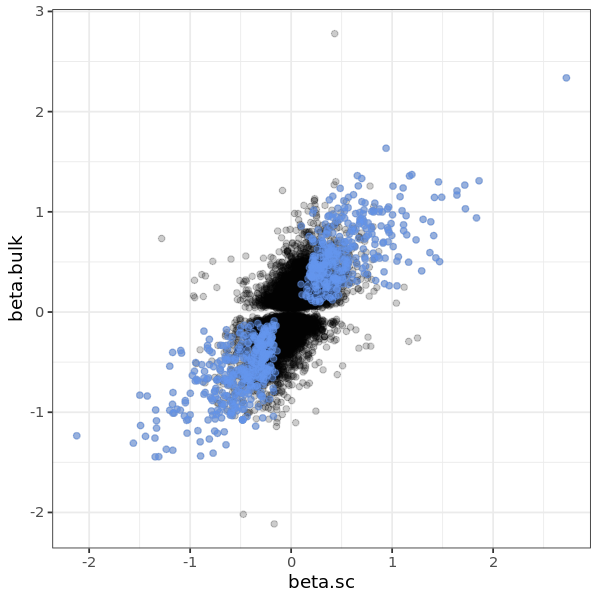

In [69]:
df2 = inner_join(df0, leads_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df2 = df2[df2$feature_id %in% common_genes,]
nrow(df2)
nrow(df2[df2$q_value < 0.05 & df2$empirical_feature_p_value.sc < emp_pv_star & df2$beta.sc*df2$beta.bulk>0,])
cor.test(df2$beta.sc, df2$beta.bulk)
ggplot(df2, aes(x = beta.sc, y = beta.bulk)) + geom_point(alpha = 0.2) + theme_bw() +
    geom_point(aes(x = beta.sc, y = beta.bulk), 
               data = df2[df2$q_value < 0.05 & df2$empirical_feature_p_value.sc < emp_pv_star & 
                          df2$beta.sc*df2$beta.bulk>0,], 
               col = "cornflowerblue", alpha = 0.5)

In [62]:
###################
# d-mean
totmean_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/"
my_folder = paste0(totmean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") 

In [63]:
df = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues
max_qval = max(df[df$q_value < 0.1,'q_value'])
emp_pv_star = max(df[df$q_value==max_qval, "empirical_feature_p_value"])
emp_pv_star
df0 = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

[1] 0.003425952

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 12769

[1] 789


	Pearson's product-moment correlation

data:  df1$beta.sc and df1$beta.bulk
t = 86.147, df = 12767, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5952184 0.6171588
sample estimates:
      cor 
0.6063039 


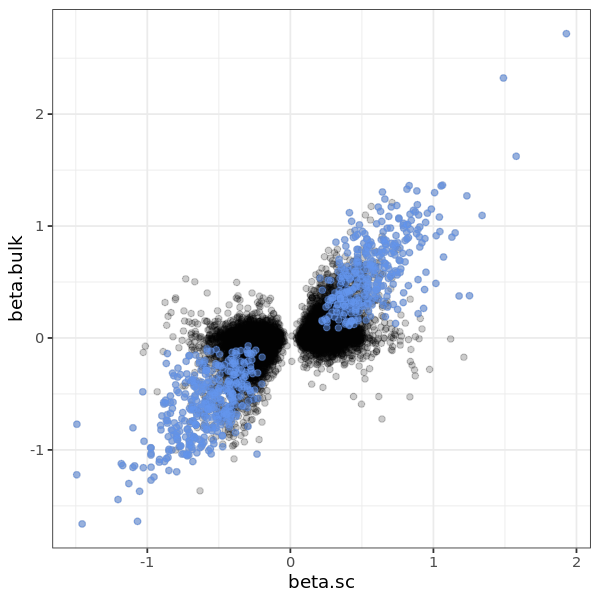

In [64]:
df1 = inner_join(df, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df1 = df1[df1$feature_id %in% common_genes,]
nrow(df1)
nrow(df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.sc < emp_pv_star & df1$beta.sc*df1$beta.bulk>0,])
cor.test(df1$beta.sc, df1$beta.bulk)
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(df1, aes(x = beta.sc, y = beta.bulk)) + geom_point(alpha = 0.2) + theme_bw() +
    geom_point(aes(x = beta.sc, y = beta.bulk), 
               data = df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.bulk < emp_pv_star_all & 
                          df1$beta.sc*df1$beta.bulk>0,], 
               col = "cornflowerblue", alpha = 0.5)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 12885

[1] 638


	Pearson's product-moment correlation

data:  df2$beta.sc and df2$beta.bulk
t = 124.79, df = 12883, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7318423 0.7474801
sample estimates:
      cor 
0.7397611 


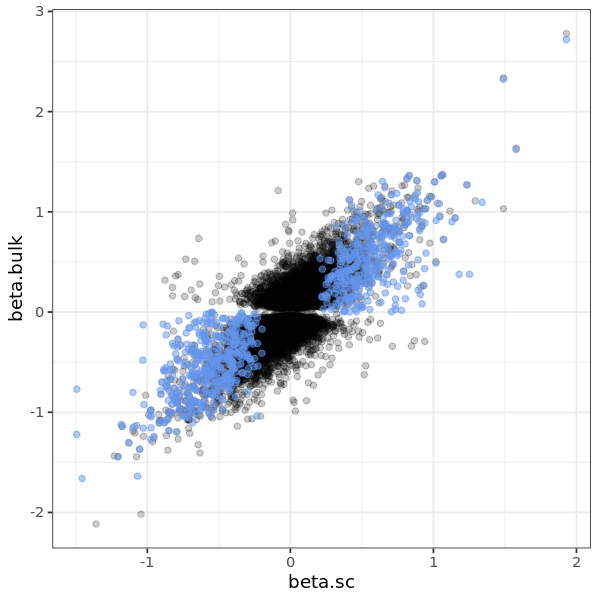

In [65]:
df2 = inner_join(df0, leads_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df2 = df2[df2$feature_id %in% common_genes,]
nrow(df2)
nrow(df2[df2$q_value < 0.05 & df2$empirical_feature_p_value.sc < emp_pv_star & df2$beta.sc*df2$beta.bulk>0,])
cor.test(df2$beta.sc, df2$beta.bulk)
ggplot(df2, aes(x = beta.sc, y = beta.bulk)) + geom_point(alpha = 0.2) + theme_bw() +
    geom_point(aes(x = beta.sc, y = beta.bulk), 
               data = df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.sc < emp_pv_star & 
                          df1$beta.sc*df1$beta.bulk>0,], 
               col = "cornflowerblue", alpha = 0.5)

In [ ]:
###################
# d-sum

In [74]:
total_sum_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totsum/"
my_folder = paste0(total_sum_folder,"Run_Output_PCA20_88_log_TPM_edgeR_libsize_206/") # edgeR, 20PCs

In [75]:
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/top_qtl_results_totsum.txt", sep = ' ')
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues
max_qval = max(df[df$q_value < 0.1,'q_value'])
emp_pv_star = max(df[df$q_value==max_qval, "empirical_feature_p_value"])
emp_pv_star
df0 = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

[1] 0.003115432

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 12655

[1] 676


	Pearson's product-moment correlation

data:  df1$beta.sc and df1$beta.bulk
t = 82.401, df = 12653, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5794960 0.6021754
sample estimates:
      cor 
0.5909525 


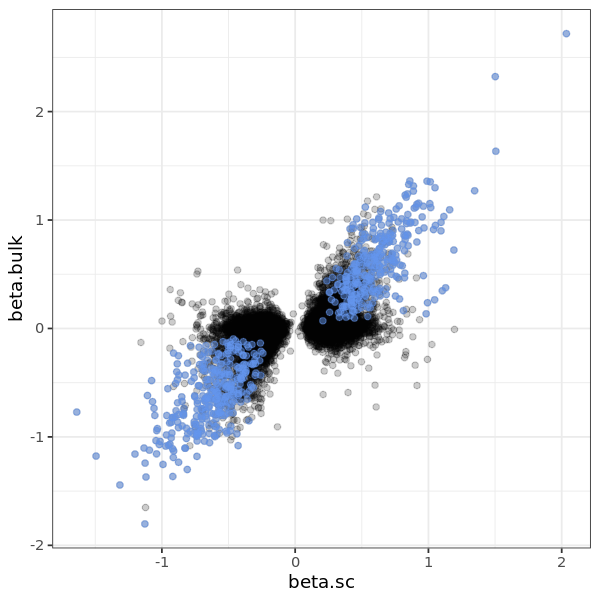

In [76]:
df1 = inner_join(df, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df1 = df1[df1$feature_id %in% common_genes,]
nrow(df1)
nrow(df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.sc < emp_pv_star & df1$beta.sc*df1$beta.bulk>0,])
cor.test(df1$beta.sc, df1$beta.bulk)
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(df1, aes(x = beta.sc, y = beta.bulk)) + geom_point(alpha = 0.2) + theme_bw() +
    geom_point(aes(x = beta.sc, y = beta.bulk), 
               data = df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.bulk < emp_pv_star_all & 
                          df1$beta.sc*df1$beta.bulk>0,], 
               col = "cornflowerblue", alpha = 0.5)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 12885

[1] 564


	Pearson's product-moment correlation

data:  df2$beta.sc and df2$beta.bulk
t = 120.71, df = 12883, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7203039 0.7365123
sample estimates:
    cor 
0.72851 


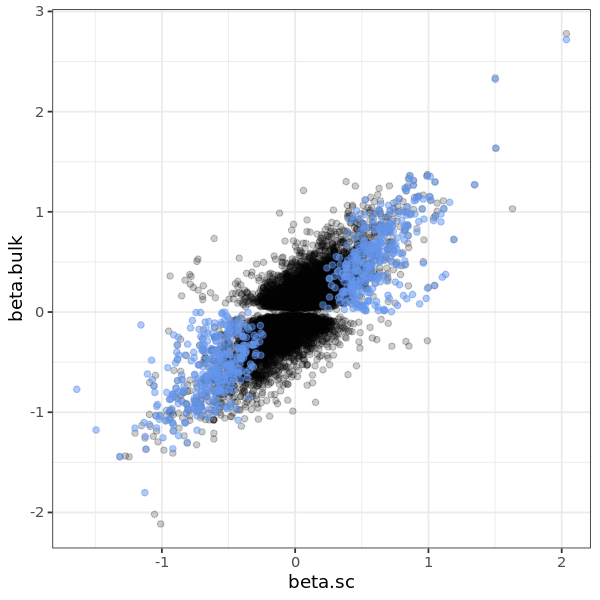

In [77]:
df2 = inner_join(df0, leads_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df2 = df2[df2$feature_id %in% common_genes,]
nrow(df2)
nrow(df2[df2$q_value < 0.05 & df2$empirical_feature_p_value.sc < emp_pv_star & df2$beta.sc*df2$beta.bulk>0,])

cor.test(df2$beta.sc, df2$beta.bulk)
ggplot(df2, aes(x = beta.sc, y = beta.bulk)) + geom_point(alpha = 0.2) + theme_bw() +
    geom_point(aes(x = beta.sc, y = beta.bulk), 
               data = df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.sc < emp_pv_star & 
                          df1$beta.sc*df1$beta.bulk>0,], 
               col = "cornflowerblue", alpha = 0.5)

In [ ]:
###################
# d-median

In [70]:
totmedian_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmedian/"
my_folder = paste0(totmedian_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [71]:
df = read.csv(paste0(my_folder,"top_qtl_results_all.txt"), sep = "\t")
df$q_value = qvalue(df$empirical_feature_p_value)$qvalues
max_qval = max(df[df$q_value < 0.1,'q_value'])
emp_pv_star = max(df[df$q_value==max_qval, "empirical_feature_p_value"])
emp_pv_star
df0 = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

[1] 0.008668768

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 12640

[1] 524


	Pearson's product-moment correlation

data:  df1$beta.sc and df1$beta.bulk
t = 59.791, df = 12638, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4558724 0.4830529
sample estimates:
      cor 
0.4695739 


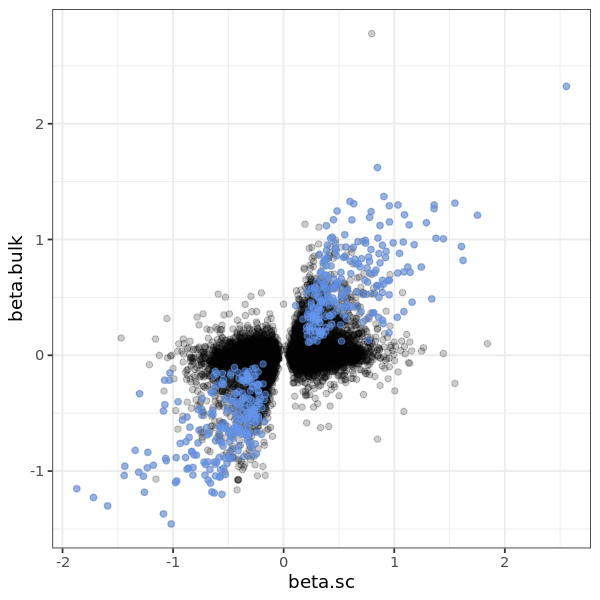

In [72]:
df1 = inner_join(df, res_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df1 = df1[df1$feature_id %in% common_genes,]
nrow(df1)
nrow(df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.sc < emp_pv_star & df1$beta.sc*df1$beta.bulk>0,])
cor.test(df1$beta.sc, df1$beta.bulk)
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(df1, aes(x = beta.sc, y = beta.bulk)) + geom_point(alpha = 0.2) + theme_bw() +
    geom_point(aes(x = beta.sc, y = beta.bulk), 
               data = df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.bulk < emp_pv_star_all & 
                          df1$beta.sc*df1$beta.bulk>0,], 
               col = "cornflowerblue", alpha = 0.5)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 12885

[1] 396


	Pearson's product-moment correlation

data:  df2$beta.sc and df2$beta.bulk
t = 85.428, df = 12883, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5902155 0.6122632
sample estimates:
      cor 
0.6013538 


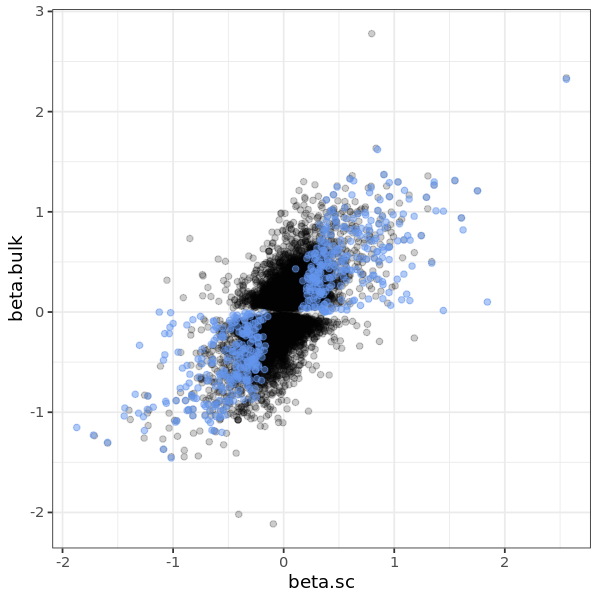

In [73]:
df2 = inner_join(df0, leads_all, by = c("snp_id","feature_id"), suffix = c(".sc",".bulk"))
df2 = df2[df2$feature_id %in% common_genes,]
nrow(df2)
nrow(df2[df2$q_value < 0.05 & df2$empirical_feature_p_value.sc < emp_pv_star & df2$beta.sc*df2$beta.bulk>0,])
cor.test(df2$beta.sc, df2$beta.bulk)
ggplot(df2, aes(x = beta.sc, y = beta.bulk)) + geom_point(alpha = 0.2) + theme_bw() +
    geom_point(aes(x = beta.sc, y = beta.bulk), 
               data = df1[df1$q_value < 0.05 & df1$empirical_feature_p_value.sc < emp_pv_star & 
                          df1$beta.sc*df1$beta.bulk>0,], 
               col = "cornflowerblue", alpha = 0.5)